## Analysis of Bigrams

1. Take any corpus(article) of your choice and analyze all the bigrams present based on ConditionalFrequencyDist and compute the co-occurence matrix.
2. Visualize the co-occurence matrix.

In [181]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize 

In [298]:
content = """Musk was born on June 28, 1971, in Pretoria, Gauteng, South Africa,[27] the son of Maye Musk (née Haldeman), a model and dietician from Regina, Saskatchewan, Canada;[28] and Errol Musk, a South African electromechanical engineer, pilot and sailor. He has a younger brother, Kimbal (born 1972), and a younger sister, Tosca (born 1974)
"""

In [299]:
words = word_tokenize(content)

In [300]:
pos_word = nltk.pos_tag(words) 

In [301]:
pos_word = [pos_word[i][1] for i in range(len(pos_word))]

In [303]:
pos_bigrams = nltk.bigrams(pos_word)
pos_cfd = nltk.ConditionalFreqDist(pos_bigrams)

## Bigram matrix by POS

In [304]:
cfd = pd.DataFrame(pos_cfd)
cfd = cfd.fillna(0)

In [305]:
cfd

,(,),",",.,:,CC,CD,DT,IN,JJ,JJR,NN,NNP,PRP,VBD,VBN,VBZ
(,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
),0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
",",0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0
.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
:,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CC,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
CD,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
DT,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
IN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
JJ,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
plt.figure(figsize = (15,8))
sns.heatmap(cfd.T, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

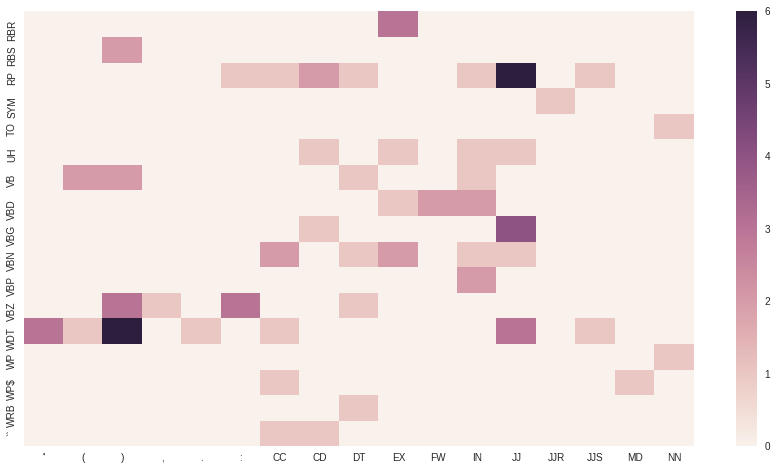

In [309]:
plt.show()

## Trigrams by POS

In [310]:
trigrams_as_bigrams = []
trigrams_list_word = list(nltk.trigrams(pos_word))
trigrams_as_bigrams.extend([((t[0],t[1]), t[2]) for t in trigrams_list_word])
cfd_trigram = nltk.ConditionalFreqDist((i, j) for (i, j) in trigrams_as_bigrams)
cfd_t = pd.DataFrame(cfd_trigram).fillna(0).T

In [314]:
plt.figure(figsize = (15,12))
sns.heatmap(cfd_t)

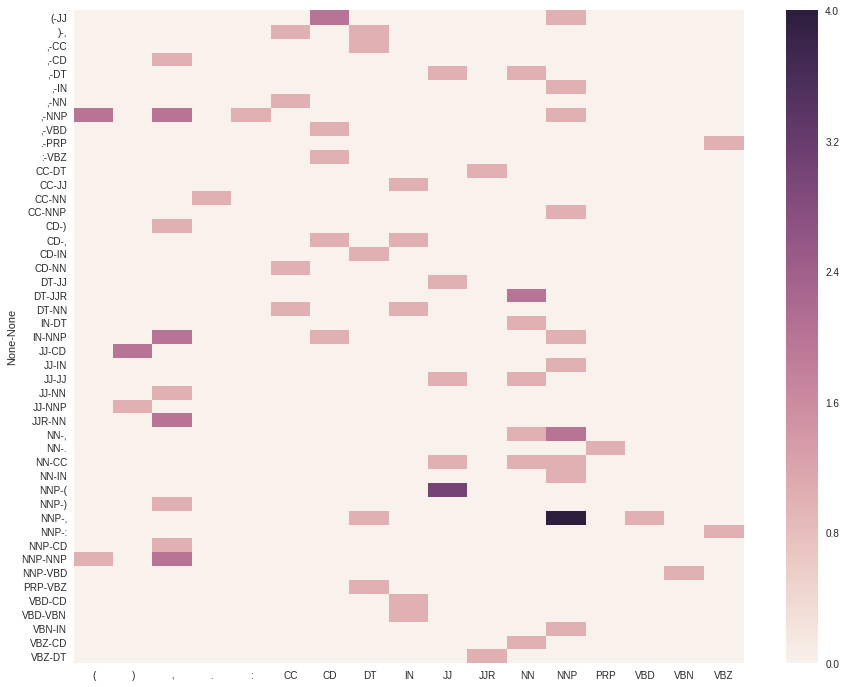

In [315]:
plt.show()

## Bigram matrix by words

In [316]:
bigrams_words = nltk.bigrams(words)
words_cfd = nltk.ConditionalFreqDist(bigrams_words)

In [317]:
cfd1 = pd.DataFrame(words_cfd)
cfd1 = cfd1.fillna(0)
col = cfd1.columns

In [318]:
plt.figure(figsize = (15,8))
sns.heatmap(cfd1.T)

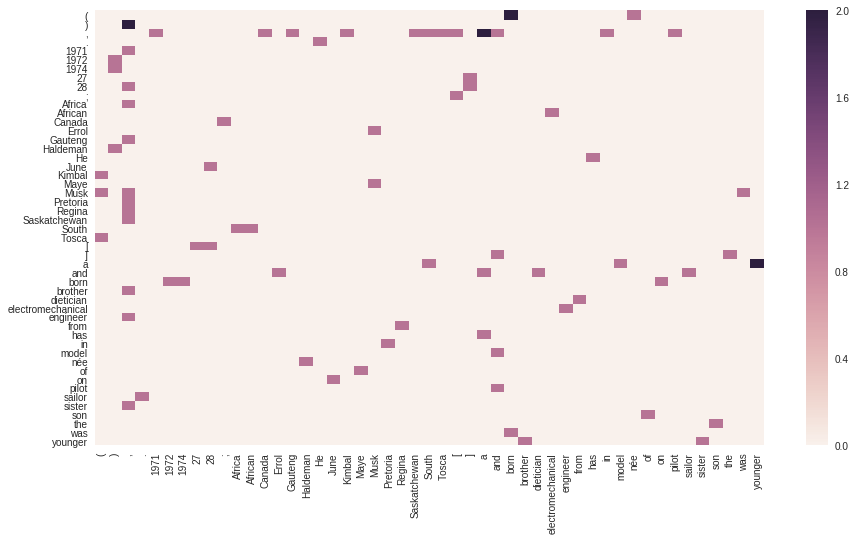

In [319]:
plt.show()

## Trigrams by words

In [320]:
trigrams_as_bigrams = []
trigrams_list_word = list(nltk.trigrams(words))
trigrams_as_bigrams.extend([((t[0],t[1]), t[2]) for t in trigrams_list_word])
cfd_trigram = nltk.ConditionalFreqDist((i, j) for (i, j) in trigrams_as_bigrams)
cfd_w = pd.DataFrame(cfd_trigram).fillna(0).T

In [321]:
cfd_w

(    )    ,    .  1971  1972  1974  \
(                 born               0.0  0.0  0.0  0.0   0.0   1.0   1.0   
                  née                0.0  0.0  0.0  0.0   0.0   0.0   0.0   
)                 ,                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
,                 1971               0.0  0.0  1.0  0.0   0.0   0.0   0.0   
                  Canada             0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  Gauteng            0.0  0.0  1.0  0.0   0.0   0.0   0.0   
                  Kimbal             1.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  Saskatchewan       0.0  0.0  1.0  0.0   0.0   0.0   0.0   
                  South              0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  Tosca              1.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  [                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  a                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  and                0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  in                 0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  pilot              0.0  0.0  0.0  0.0   0.0   0.0   0.0   
.                 He                 0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1971              ,                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1972              )                  0.0  0.0  1.0  0.0   0.0   0.0   0.0   
27                ]                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
28                ,                  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
                  ]                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
;                 [                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
Africa            ,                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
African           electromechanical  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
Canada            ;                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
Errol             Musk               0.0  0.0  1.0  0.0   0.0   0.0   0.0   
Gauteng           ,                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
Haldeman          )                  0.0  0.0  1.0  0.0   0.0   0.0   0.0   
He                has                0.0  0.0  0.0  0.0   0.0   0.0   0.0   
June              28                 0.0  0.0  1.0  0.0   0.0   0.0   0.0   
...                                  ...  ...  ...  ...   ...   ...   ...   
]                 the                0.0  0.0  0.0  0.0   0.0   0.0   0.0   
a                 South              0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  model              0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  younger            0.0  0.0  0.0  0.0   0.0   0.0   0.0   
and               Errol              0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  a                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  dietician          0.0  0.0  0.0  0.0   0.0   0.0   0.0   
                  sailor             0.0  0.0  0.0  1.0   0.0   0.0   0.0   
born              1972               0.0  1.0  0.0  0.0   0.0   0.0   0.0   
                  1974               0.0  1.0  0.0  0.0   0.0   0.0   0.0   
                  on                 0.0  0.0  0.0  0.0   0.0   0.0   0.0   
brother           ,                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
dietician         from               0.0  0.0  0.0  0.0   0.0   0.0   0.0   
electromechanical engineer           0.0  0.0  1.0  0.0   0.0   0.0   0.0   
engineer          ,                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
from              Regina             0.0  0.0  1.0  0.0   0.0   0.0   0.0   
has               a                  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
in                Pretoria           0.0  0.0  1.0  0.0   0.0   0.0   0.0   
model             and                0.0  0.0  0.0  0.0   0.0   0.0   0.0   
née               Haldeman           0.0  1.0  0.0  0.0   0.0   0.0   0.0   
of                Maye             

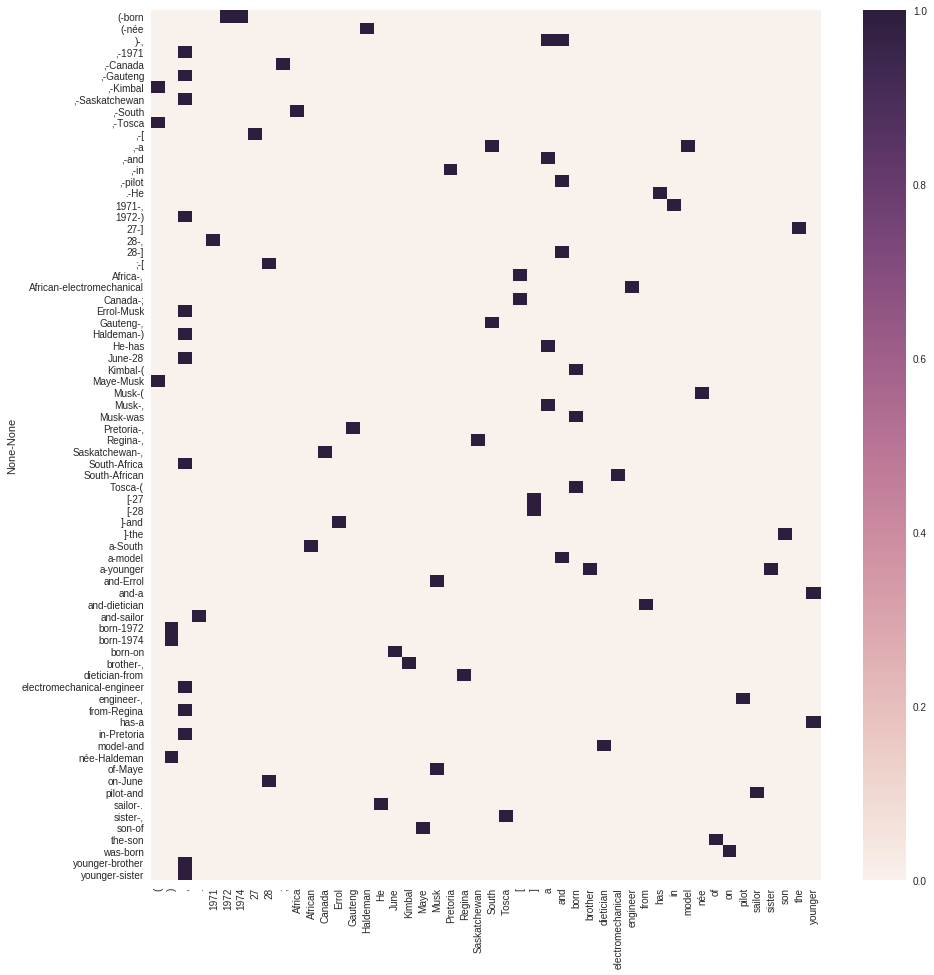

In [322]:
plt.figure(figsize = (15,16))
sns.heatmap(cfd_w)
plt.show()